In [2]:
# Importing Libraries
import selenium
import pandas as pd
import time
from bs4 import BeautifulSoup

# Importing selenium webdriver 
from selenium import webdriver

# Importing required Exceptions which needs to handled
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

#Importing requests
import requests

# importing regex
import re

#### 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. 

In [166]:
driver= webdriver.Chrome("chromedriver.exe")
url='https://www.amazon.in/ref=nav_logo'
driver.get(url)

In [3]:
# Activating the chrome browser
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

# Opening the homepage of Amazon.in
url = "https://www.amazon.in/"
driver.get(url)

time.sleep(2)
# Asking the user to input the keywords he/she wants to search
user_inp = input('Enter the product you want to search : ')

Enter the product you want to search : guitar 


In [4]:
search_bar = driver.find_element_by_id("twotabsearchtextbox")    # Locating searc_bar by id
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys(user_inp)                                   # sending user input to search bar
search_button = driver.find_element_by_xpath('//div[@class="nav-search-submit nav-sprite"]/span/input')       # Locating search_button by xpath
search_button.click()                                                                # Clicking the button to start search

#### 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a dataframe and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“. 

In [ ]:
# scrape all product urls
product_urls = []
start=0
end=3
for page in range(start,end):#for loop for scrapping 3 page
    url=driver.find_elements_by_xpath('//a[@class="a-link-normal a-text-normal"]')       #scraping urls
    for i in url:
        product_urls.append(i.get_attribute("href"))                        #appending the urls in product_urls list
    nxt_button=driver.find_element_by_xpath("//li[@class='a-last']//a")     #scraping the list of buttons from the page
    nxt_button.click()
    time.sleep(2)

#Make empty lists
Brand = []   
Name = []
Rating = []
no_of_ratings = []
Price = []
Return = []
expected_delivery = []
Availability = [] 
Other_Details = []

for url in product_urls:
    driver.get(url)
    time.sleep(2)
    
    # Extracting Brand from xpath
    try:
        brand = driver.find_element_by_xpath('//a[@id="bylineInfo"]')      
        Brand.append(brand.text)
    except NoSuchElementException:
        Brand.append('-')    

In [ ]:
    time.sleep(1)
    # Extracting name from id
    try:
        name = driver.find_element_by_id('productTitle')      
        Name.append(name.text)
    except NoSuchElementException:
        Name.append('-')


    time.sleep(1)    
    # Extracting Ratings from xpath    
    try:
        rating = driver.find_element_by_xpath('//span[@class="a-size-base a-nowrap"]//span')  
        Rating.append(rating.text)
    except NoSuchElementException:
        Rating.append('-')


    time.sleep(1)
    # Extracting No of Ratings from xpath
    try:
        no_rating = driver.find_element_by_xpath('//span[@class="a-size-base a-color-secondary"]')  
        no_of_ratings.append(no_rating.text)
    except NoSuchElementException:
        no_of_ratings.append('-')


    time.sleep(1)
    # Extracting price from xpath    
    try:
        price = driver.find_element_by_xpath('//td[@class="a-span12"]')  
        Price.append(price.text)
    except NoSuchElementException:
        Price.append('-')

In [ ]:
    time.sleep(1)
    # Extracting Return from xpath
    try:
        return_ = driver.find_element_by_xpath('//a[@class="a-size-small a-link-normal a-text-normal"]')  
        Return.append(return_.text)
    except NoSuchElementException:
        Return.append('-')


    time.sleep(1)
    # Extracting expected_delivery from xpath
    try:
        exptd_dlvry= driver.find_element_by_xpath('//span[@class="a-color-error"]')  
        expected_delivery.append(exptd_dlvry.text)
    except NoSuchElementException:
         expected_delivery.append('-')


    time.sleep(1)
    # Extracting Availability from xpath         
    try:
        avl= driver.find_element_by_xpath('//span[@class="a-size-medium a-color-success"]')  
        Availability.append(avl.text)
    except NoSuchElementException:
        Availability.append('-')

In [5]:
    time.sleep(1)
    # Extracting Other Details from xpath    
    try:
        othr_dtls= driver.find_element_by_xpath('//ul[@class="a-unordered-list a-vertical a-spacing-mini"]')  
        Other_Details.append(othr_dtls.text)
    except NoSuchElementException:
        Other_Details.append('-')

time.sleep(2)    
# Make dataframe
prod_df = pd.DataFrame({'Brand':Brand,'Name':Name,'Rating':Rating,'No. of ratings':no_of_ratings,'Price':Price,
                        'Return/Exchange':Return,'Expected Delivery':expected_delivery,'Availability':Availability,
                        'Other Details':Other_Details,'URL':product_urls})
prod_df.head(5) 

,Brand,Name,Rating,No. of ratings,Price,Return/Exchange,Expected Delivery,Availability,Other Details,URL
0,Visit the JUAREZ Store,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",4 out of 5,"13,363 global ratings","₹1,899.00",Pay on Delivery,-,In stock.,"Black Glossy Finish, Number of Frets: 18, Acou...",https://www.amazon.in/Juarez-Acoustic-Cutaway-...
1,Visit the Intern Store,"Intern INT-38C Acoustic Guitar Kit, With Bag, ...",4 out of 5,"7,256 global ratings","₹1,790.00",Pay on Delivery,-,In stock.,Great looks with an innovative design to produ...,https://www.amazon.in/Intern-INT-38C-Acoustic-...
2,Visit the JUAREZ Store,"Juarez Acoustic Guitar Kit, 38 Inch Cutaway, 3...",4 out of 5,"4,492 global ratings","₹1,777.00",Pay on Delivery,-,In stock.,"Black glossy finish, number of frets: 18, acou...",https://www.amazon.in/JUAREZ-JRZ38C-Acoustic-S...
3,Visit the Kadence Store,"Kadence Guitar Acoustica Series, Electric Acou...",3.9 out of 5,Total price:,"₹6,174.00",Pay on Delivery,-,In stock.,Product Type : Acoustic Guitar Fretboard mater...,https://aax-eu.amazon.in/x/c/QhIciyFqiqP7Rv7de...
4,Visit the JUAREZ Store,"Juarez Acoustic Guitar, 38 Inch Curved Body Cu...",4 out of 5,"1,198 global ratings","₹1,777.00",Pay on Delivery,-,In stock.,"Jumbo Design, 38 Inch Acoustic Steel String Gu...",https://www.amazon.in/Juarez-Acoustic-Guitar-C...


#### 3. Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.  

In [4]:
#For obtaining address of google images and selecting the xpath for the search btn
url='https://images.google.com/'
driver.get(url)
#Getting fruit images
gi=driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')
gi.send_keys('fruits')
gi_find=driver.find_element_by_xpath('//button[@class="Tg7LZd"]')
gi_find.click()

In [5]:
#for sracping the fruits images tags
f_i=driver.find_elements_by_xpath('//div[@class="bRMDJf islir"]//img')
f_i[0:100]

[<selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="f101ecdc-1628-435e-84af-1b8de9803281")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="2004573f-ad22-4b8a-8d35-b702bfefd564")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="a886d2a7-fd68-4b25-b7f3-79c9c8d7f579")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="eaaa0be9-48e6-4c3c-8f69-ae13e3a2fc3d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="f2b9b9d1-3601-4271-9daf-21c4c0870e96")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="9b538934-125d-43c7-b02e-c827cba8ba8a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="e9c9b8ce-a03b-4ec1-9fde-16

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScNsyItlDyI1EElKhTmRzYCioXSNaDvYNztw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlCy3oYbyuVFpu_1gPqRsxYmFnuhD8TyY33w&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQc65bNSDE9i7baVuF9ftpQkabn68R7FKCJyw&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
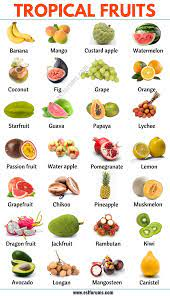
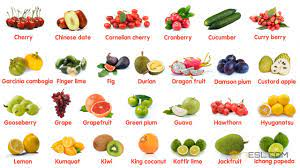
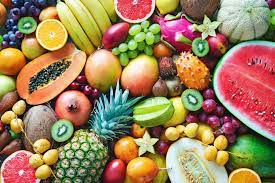
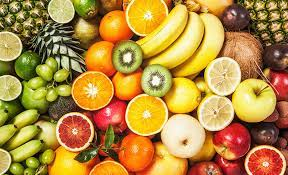
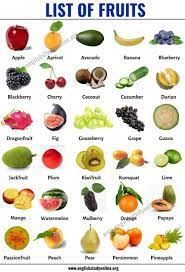
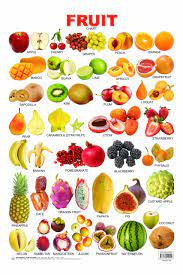
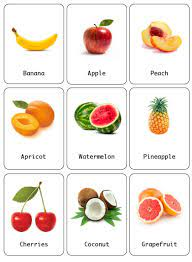
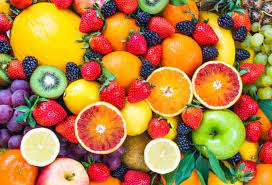
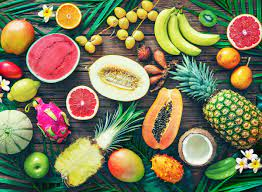
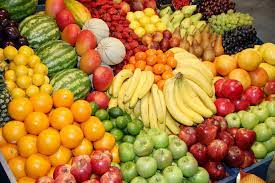
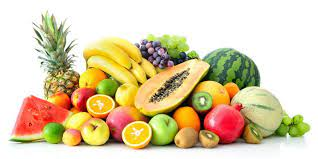
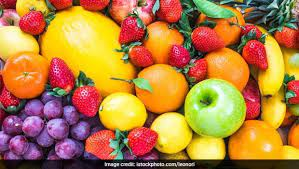
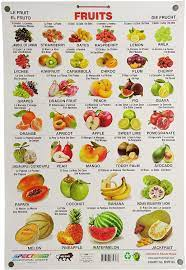
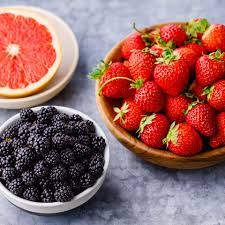
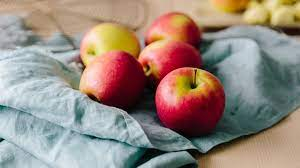
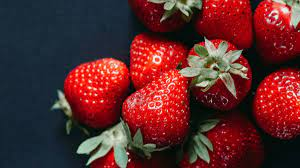
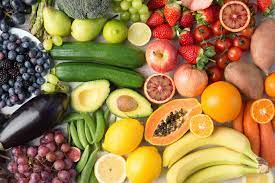
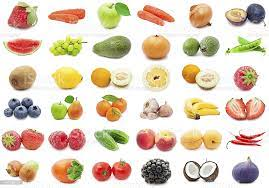
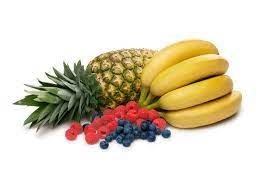
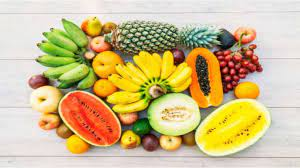

In [6]:
f_img=[]
for i in f_i:
    SRC=i.get_attribute('src')
    f_img.append(SRC)
f_img[0:100]   

In [7]:
#For obtaining address of google images and selecting the xpath for the search btn
url='https://images.google.com/'
driver.get(url)
#Getting car images
gi=driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')
gi.send_keys('cars')
gi_find=driver.find_element_by_xpath('//button[@class="Tg7LZd"]')
gi_find.click()

In [8]:
#for sracping the car images tags
c_i=driver.find_elements_by_xpath('//div[@class="bRMDJf islir"]//img')
c_i[0:100]

[<selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="2f385c68-2989-438d-b7e3-f6f25dfc81ef")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="ff7aebef-5603-4d33-8277-a24c739e7570")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="731d9440-121e-4aa1-87b5-05b57d2584db")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="bc2aa3d1-33dd-477b-859d-e2c3a915b4ee")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="586f1ffa-9af3-4634-9f7b-41081bd104c0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="fda78561-8ea8-4922-b6fc-04abbe16feba")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="50bfa58d-1258-4793-ae7c-69

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQn94mjwfKc2LlgNtN9zy5QKaghdPKDmu4Lzw&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
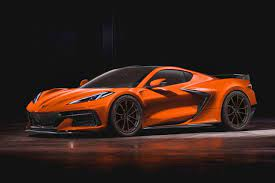
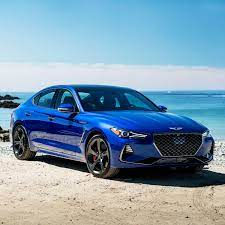
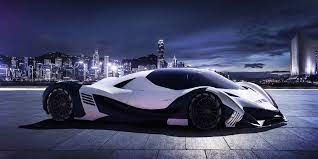
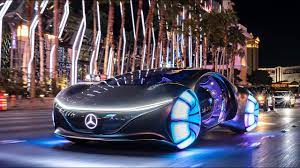
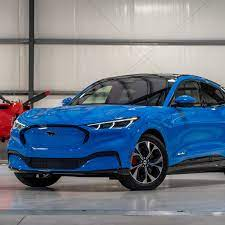
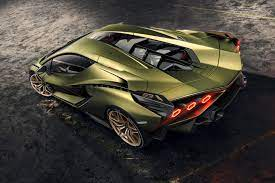
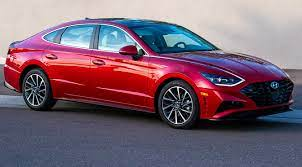
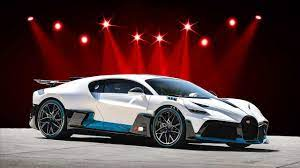
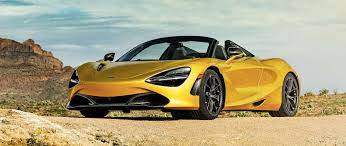
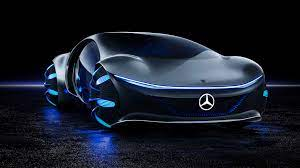
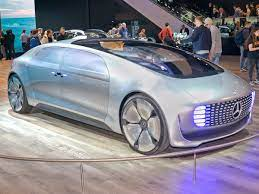
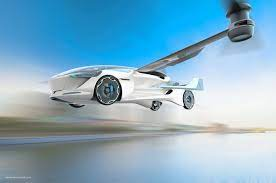
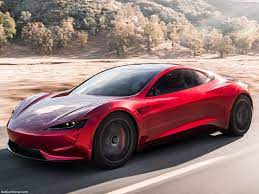
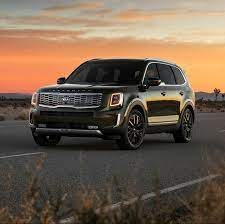
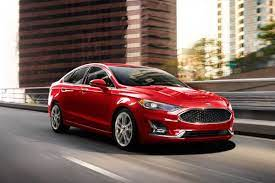
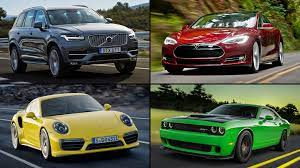
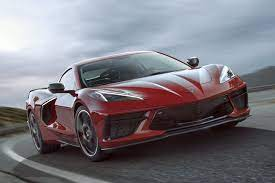
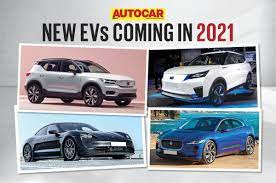
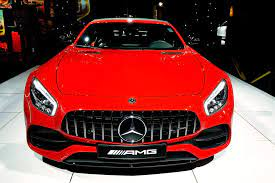
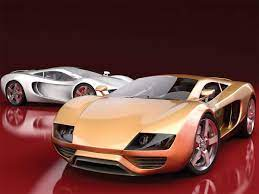

In [9]:
#getting the car images src in a list
c_img=[]
for i in c_i:
    c_img.append(i.get_attribute('src'))
c_img[0:100]   

In [10]:
#For obtaining address of google images and selecting the xpath for the search btn
url='https://images.google.com/'
driver.get(url)
#Getting Machine Learning images
gi=driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')
gi.send_keys('Machine Learning')
gi_find=driver.find_element_by_xpath('//button[@class="Tg7LZd"]')
gi_find.click()

In [11]:
#for sracping the Machine Learning  images tags
ml_i=driver.find_elements_by_xpath('//div[@class="bRMDJf islir"]//img')
ml_i[0:100]

[<selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="93e91d52-d780-4de0-8e41-501454126971")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="d053dd5c-2f4b-4656-ab49-74924eecc374")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="98379450-2cb7-4901-8e57-4c8b4aa6d15b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="c838da3e-6a7c-4bc3-b34f-4b208781ad2b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="91cd12a8-3075-4273-ad0e-7165d67a9fe4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="0fe0fb8c-7bc8-400d-81f1-77abea3ad7d7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d31edebc6036213a1d1aa598d4bfd484", element="e06400ff-d5fb-4144-b979-99

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
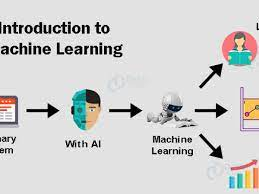
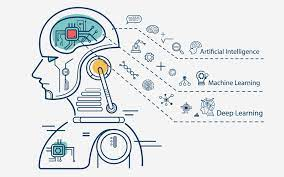
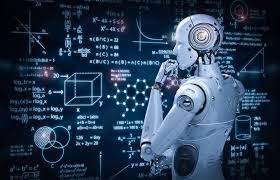
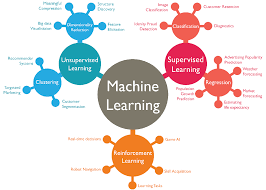
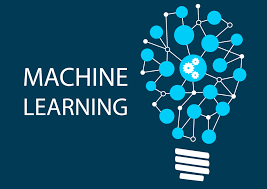
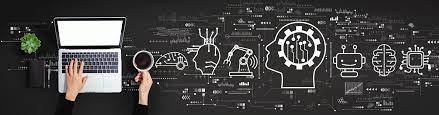
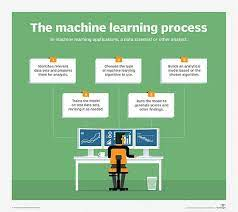
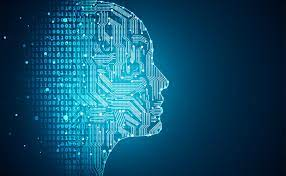
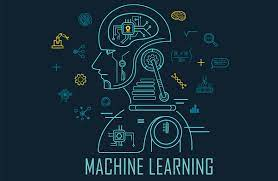
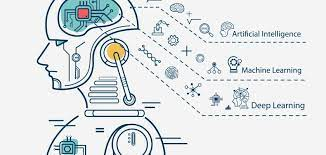
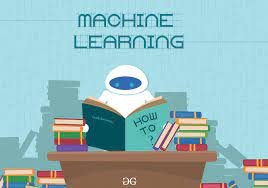
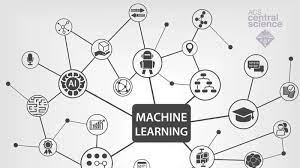
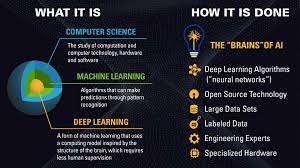
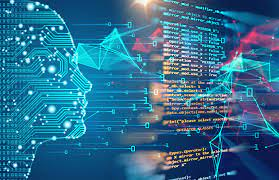
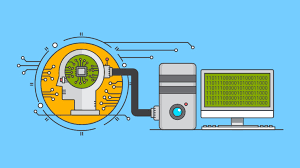
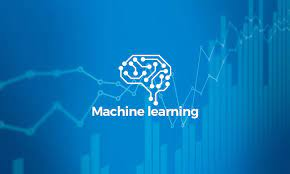
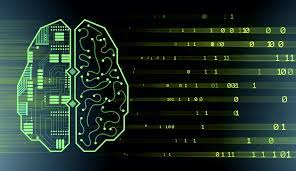
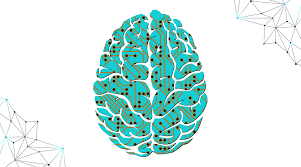
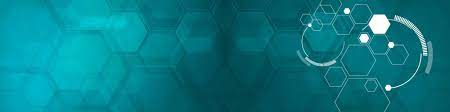
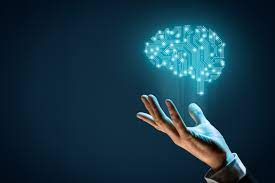

In [12]:
#getting the Machine Learning images src in a list
ml_img=[]
for i in ml_i:
    ml_img.append(i.get_attribute('src'))
ml_img[0:100]   

##### 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. In case if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV. 

In [99]:
driver = webdriver.Chrome("chromedriver.exe")
url='https://www.flipkart.com/'
driver.get(url)
close_pop_up=driver.find_element_by_xpath('//button[@class="_2KpZ6l _2doB4z"]')
close_pop_up.click()
src_b=driver.find_element_by_xpath('/html/body/div/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
src_b.send_keys('iphone')
src_b.send_keys(u'\ue007')

In [101]:
n=driver.find_elements_by_xpath('//div[@class="_4rR01T"]')
name=[]
for i in n:
    name.append(i.text)
name    

['APPLE iPhone SE (Black, 64 GB)',
 'Apple iPhone XR ((PRODUCT)RED, 64 GB) (Includes EarPods, Power Adapter)',
 'APPLE iPhone 11 (Black, 64 GB)',
 'APPLE iPhone SE (White, 64 GB)',
 'APPLE iPhone SE (Red, 64 GB)',
 'APPLE iPhone SE (Black, 128 GB)',
 'APPLE iPhone 11 (Red, 64 GB)',
 'APPLE iPhone 12 Mini (White, 128 GB)',
 'APPLE iPhone 12 Mini (Black, 128 GB)',
 'APPLE iPhone 12 (White, 128 GB)',
 'Apple iPhone XR (White, 64 GB) (Includes EarPods, Power Adapter)',
 'APPLE iPhone 12 (Blue, 64 GB)',
 'APPLE iPhone 12 (Red, 64 GB)',
 'APPLE iPhone 12 Pro (Pacific Blue, 256 GB)',
 'APPLE iPhone SE (Red, 128 GB)',
 'APPLE iPhone SE (White, 128 GB)',
 'APPLE iPhone 12 (Black, 64 GB)',
 'APPLE iPhone 11 Pro (Midnight Green, 64 GB)',
 'APPLE iPhone 12 (Purple, 64 GB)',
 'APPLE iPhone 12 Mini (Blue, 128 GB)',
 'APPLE iPhone XR (Black, 64 GB)',
 'APPLE iPhone 12 Mini (Blue, 64 GB)',
 'APPLE iPhone 12 (Red, 256 GB)',
 'APPLE iPhone 12 Mini (Red, 64 GB)']

In [103]:
storage=[]
rom=driver.find_elements_by_xpath('//li[@class="rgWa7D"]')
for i in rom:
    storage.append(i.text)
storage    

['64 GB ROM',
 '11.94 cm (4.7 inch) Retina HD Display',
 '12MP Rear Camera | 7MP Front Camera',
 'A13 Bionic Chip with 3rd Gen Neural Engine Processor',
 'Water and Dust Resistant (1 meter for Upto 30 minutes, IP67)',
 'Fast Charge Capable',
 'Wireless charging (Works with Qi Chargers | Qi Chargers are Sold Separately',
 'Brand Warranty of 1 Year',
 '64 GB ROM',
 '15.49 cm (6.1 inch) Display',
 '12MP Rear Camera | 7MP Front Camera',
 'A12 Bionic Chip Processor',
 'iOS 13 Compatible',
 'Brand Warranty of 1 Year',
 '64 GB ROM',
 '15.49 cm (6.1 inch) Liquid Retina HD Display',
 '12MP + 12MP | 12MP Front Camera',
 'A13 Bionic Chip Processor',
 'Brand Warranty of 1 Year',
 '64 GB ROM',
 '11.94 cm (4.7 inch) Retina HD Display',
 '12MP Rear Camera | 7MP Front Camera',
 'A13 Bionic Chip with 3rd Gen Neural Engine Processor',
 'Water and Dust Resistant (1 meter for Upto 30 minutes, IP67)',
 'Fast Charge Capable',
 'Wireless charging (Works with Qi Chargers | Qi Chargers are Sold Separately',
 '

#### 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps. 

In [13]:
#getting to the gmaps page
driver= webdriver.Chrome("chromedriver.exe")
url= 'https://www.google.com/maps'
driver.get(url)

In [14]:
#geetting the area and search
loc_s=driver.find_element_by_xpath('//input[@class="tactile-searchbox-input"]')
loc_s.send_keys('jalapiguri')
s_b=driver.find_element_by_xpath('/html/body/jsl/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/button')
s_b.click()

In [15]:
coordinates=driver.find_element_by_xpath('/html/head')
coordinates

<selenium.webdriver.remote.webelement.WebElement (session="27aa9ef1cd511e6fe6b566298f07cd4c", element="62682788-6474-467a-bdfa-af51cc9aa578")>

##### 6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in. 

In [105]:
#getting to the page
driver= webdriver.Chrome("chromedriver.exe")
url= 'https://www.trak.in'
driver.get(url)

In [107]:
fd=driver.find_element_by_xpath('/html/body/div[1]/header/div[2]/div/div/div/div/nav/ul/li[9]/a')
fd.click()

In [108]:
sep_d=[]
s_date=driver.find_elements_by_xpath('//td[@class="column-2"]')
for i in s_date:
    sep_d.append(i.text)
sep_d    

['01/04/2021',
 '05/04/2021',
 '14/04/2021',
 '07/04/2021',
 '14/04/2021',
 '04/03/2021',
 '31/03/2021',
 '30/03/2021',
 '30/03/2021',
 '23/03/2021',
 '25/03/2021',
 '26/03/2021',
 '11/02/2021',
 '22/02/2021',
 '19/02/2021',
 '17/02/2021',
 '15/02/2021',
 '12/02/2021',
 '12/02/2021',
 '09/02/2021',
 '09/02/2021',
 '15/01/2021',
 '28/01/2021',
 '19/01/2021',
 '19/01/2021',
 '18/01/2021',
 '18/01/2021',
 '11/01/2021',
 '13/01/2021',
 '15/12/2020',
 '21/12/2020',
 '15/12/2020',
 '22/12/2020',
 '15/12/2020',
 '18/12/2020',
 '30/11/2020',
 '30/11/2020',
 '29/11/2020',
 '27/11/2020',
 '25/11/2020',
 '25/11/2020',
 '25/11/2020',
 '24/11/2020',
 '30/11/2020',
 '23/11/2020',
 '28/10/2020',
 '28/10/2020',
 '28/10/2020',
 '27/10/2020',
 '27/10/2020',
 '27/10/2020',
 '27/10/2020',
 '15/10/2020',
 '26/10/2020',
 '28/10/2020',
 '08/09/2020',
 '12/09/2020',
 '09/09/2020',
 '02/09/2020',
 '09/09/2020',
 '07/09/2020',
 '07/09/2020',
 '31/08/2020',
 '31/08/2020',
 '03/09/2020',
 '08/09/2020',
 '15/08/20

In [111]:
indu=[]
industry=driver.find_elements_by_xpath('//td[@class="column-4"]')
for i in industry:
    indu.append(i.text)
indu    

['Edu-tech',
 'E-commerce',
 'Online Food Delivery',
 'FinTech',
 'E-commerce',
 'E-commerce',
 'Technology',
 'E-commerce',
 'Edu-tech',
 'Edu-tech',
 'E-commerce',
 'FinTech',
 'Edu Tech',
 'Hospitality',
 'Hospitality',
 'FinTech',
 'Finance',
 'E-commerce',
 'E-Commerce',
 'Technology',
 'EdTech',
 'Financial Services',
 'Consumer Goods Company',
 'AgriTech Startup',
 'SaaS',
 'Health Tech Startup',
 'EdTech',
 'Food Startup',
 'B2B E-commerce',
 'Food and Beverage',
 'Financial Services',
 'Technology Provider',
 'FinTech',
 'Supply chain',
 'SaaS',
 'EduTech',
 'Financial Services',
 'Food and Beverage',
 'Lifestyle',
 'Transportation',
 'SaaS',
 'Edutech',
 'FinTech',
 'Fintech',
 'Dairy Tech',
 'E-commerce',
 'Digital Solutions',
 'FinTech',
 'FinTech',
 'E-commerce',
 'AgriTech',
 'Advertising',
 'Hospitality',
 'Information Technology',
 'FinTech',
 'EduTech',
 'Personal Care',
 'EduTech',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'E-commerce',
 'E-commerc

In [112]:
sv=[]
sub=driver.find_elements_by_xpath('//td[@class="column-5"]')
for i in sub:
    sv.append(i.text)
sv   

['Online tutoring',
 'Online reselling platform',
 'Online Food Delivery',
 'Investment platform',
 'Global B2B marketplace',
 'Online shopping platform',
 'Conversational Service Automation (CSA)',
 'Hyper-local delivery app',
 'Online tutoring',
 'Career and job-oriented upskilling.',
 'Social ecommerce and online grocery platform',
 'Commerce and payments platform to offline enterprise businesses.',
 'E-Learning Platform',
 'Online Food Delivery Platform',
 'Semi-cooked food delivery app',
 'Global Neobank Venture',
 'Digital lending platform',
 'Multi-brand furniture brand',
 'Online supermarket',
 'Consumer Technology Venture',
 'Game-based learning programme',
 'Insurance Services',
 'Shave care, beard care, and skincare products',
 'online marketplace for farm products and services',
 'HR Tech',
 'AI-powered telemedicine mobile app',
 'Online learning platform for kids in class 1-5',
 'Whole Food plant based Nashta',
 'Pharmacies',
 'Craft Beer',
 'Payment Solutions Provider',
 

In [114]:
location=[]
loc=driver.find_elements_by_xpath('//td[@class="column-6"]')
for i in loc:
    location.append(i.text)
location

['Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Mumbai',
 'Jaipur, Rajasthan',
 'Palo Alto',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Mumbai',
 'Mumbai',
 'Bengaluru',
 'Mumbai',
 'Gurgaon',
 'London',
 'Gurgaon',
 'Bengaluru',
 'New Delhi',
 'Patna',
 'Mumbai',
 'Bengaluru',
 'Gurgaon',
 'Pune',
 'Bengaluru',
 'New Delhi',
 'Noida',
 'Washington',
 'Mumbai',
 'Gurgaon',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'New Delhi',
 'Bengaluru',
 'Mumbai',
 'Gurgaon',
 'Bengaluru',
 'Bengaluru',
 'Gurgaon',
 'Gurugram',
 'Mumbai',
 'Bangalore',
 'Mumbai',
 'Mumbai',
 'Bangalore',
 'Gurgaon',
 'Mumbai',
 'Bangalore',
 'Wilmington, Delaware, United States',
 'Mumbai',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'New Delhi',
 'Newark, Delaware, United States of Amercia',
 'Bangalore',
 'Gurgaon',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Stanford, California,',
 'Noida',

In [116]:
investor=[]
iv=driver.find_elements_by_xpath('//td[@class="column-7"]')
for i in iv:
    investor.append(i.text)
investor  

['Innoven Capital',
 'SoftBank Vision Fund 2',
 'Amansa Holdings, Carmignac, Falcon Edge Capital, Goldman Sachs, Think Investments',
 'MC Global Edtech, B Capital, Baron, others',
 'Hindustan Media Ventures',
 'Innoven Capital',
 'Sorenson Capital Partners',
 'Krishtal Advisors Pte Ltd',
 'MC Global Edtech, B Capital, Baron, others',
 'Titan Capital, others',
 'Accel Partners',
 'PayU',
 'SIG Global, Sequoia Capital, WaterBridge Ventures and ON Mauritius',
 'Tiger Global, Kora',
 'Rhodium Trust, Accel Partners and Swiggy',
 'Accel Partners and Lightspeed Venture Partners',
 'Azim Premji’s PremjiInvest and South Korea’s Mirae Asset Venture',
 'InnoVen Capital',
 'SoftBank Vision Fund (SVF)',
 'GV',
 'Owl Ventures',
 'A91 Partners, Faering Capital, TVS Capital Funds',
 'Reckitt Benckiser',
 'Prosus Ventures',
 'Salesforce Ventures',
 'Heritas Capital Management',
 'Sequoia Capital',
 'SIDBI Venture Capital',
 'Matrix Partners India, RTP Global, others',
 'Nishant Mittal, Pankaj Chaddah a

In [118]:
iv_type=[]
i_t=driver.find_elements_by_xpath('//td[@class="column-8"]')
for i in i_t:
    iv_type.append(i.text)
iv_type   

['Series F',
 'Series E',
 'Series J',
 'Series D',
 'Venture',
 'Debt Financing',
 'Series D',
 'Series E',
 'Series F',
 'Seed',
 'Series A',
 'Series A',
 'Series B',
 'Venture',
 'Series C',
 'Seed',
 'Series C',
 'Debt Financing',
 'Unspecified',
 'Series A',
 'Series C',
 'Venture',
 'Venture',
 'Series C',
 'Seed',
 'Venture Round',
 'Seed Funding',
 'Series',
 'Seed',
 'Funding',
 'Secondary Market',
 'Series D',
 'Seed',
 'Secondary Market',
 'Series A',
 'Seed',
 'Series C',
 'Bridge Funding',
 'Pre-series E',
 'Series A',
 'Series A',
 'Venture',
 'Series B',
 'Pre-Series A',
 'Series C',
 'Personal Investment',
 'Series B',
 'Equity and Debt',
 'Seed',
 'Series C',
 'Debt',
 'Series A',
 '',
 'Seed',
 'Follow-On',
 'Private Equity',
 'Series B',
 'Angel',
 'Series B',
 'Series A',
 'Debt Financing',
 'In Progress',
 'Series B',
 'Series A',
 'Seed',
 'pre-Series A',
 'Series F',
 '',
 'Series D1',
 'In Progress',
 'Seed',
 'In Progress',
 '',
 '',
 'Venture',
 'Series A',
 

In [119]:
amount=[]
amt=driver.find_elements_by_xpath('//td[@class="column-9"]')
for i in amt:
    amount.append(i.text)
amount    

['460,000,000',
 '300,000,000',
 '343,000,000',
 '83,000,000',
 '7,400,000',
 '250,000,000',
 '140,000,000',
 '8,000,000',
 '460,000,000',
 '300,000,000',
 '11,000,000',
 '27,500,000',
 '2,500,000',
 '250,000,000',
 '2,747,045.20',
 '1,50,00,000',
 '75,000,000',
 '4,773,958',
 '55,000,000',
 '15,000,000',
 '18,000,000',
 '1,80,00,000',
 '6,172,258.50',
 '30,000,000',
 '15,000,000',
 '16,000,000',
 '15,000,000',
 '100,000,000',
 '4,000,000',
 '1,273,634.07',
 'Undisclosed',
 '160,000,000',
 '1,000,000',
 '25,000,000',
 '15,000,000',
 '560,000',
 '80,000,000',
 '3,000,000',
 '1,001,047.92',
 '7,700,000',
 '6,003,806',
 '75,000,000-100,000,000',
 '35,300,000',
 '3,500,000',
 '25,000,000',
 'NA',
 '10,000,000',
 '20,160,000',
 '5,000,000',
 '121,000,000',
 '4,700,000',
 '15,000,000',
 '6,000,000',
 '4,500,000',
 '4,500,000',
 '500,000,000',
 '3,000,000',
 '370,000',
 '15,500,000',
 '4,500,000',
 'upto 8,900,000',
 '100,000,000',
 '5,400,000',
 '8,000,000',
 '950,000',
 'NA',
 '32,000,000',

In [120]:
trak=pd.DataFrame()
trak['Date']=sep_d[0:30]
trak['INDUSTRY']=indu[0:30]
trak['SubVertical']=sv[0:30]
trak['LOCATION']=location[0:30]
trak['INVESTOR']=investor[0:30]
trak['INVESTMENT_TYPE']=iv_type[0:30]
trak['AMOUNT']=amount[0:30]
trak

,Date,INDUSTRY,SubVertical,LOCATION,INVESTOR,INVESTMENT_TYPE,AMOUNT
0,01/04/2021,Edu-tech,Online tutoring,Bengaluru,Innoven Capital,Series F,"460,000,000"
1,05/04/2021,E-commerce,Online reselling platform,Bengaluru,SoftBank Vision Fund 2,Series E,"300,000,000"
2,14/04/2021,Online Food Delivery,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,"343,000,000"
3,07/04/2021,FinTech,Investment platform,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,"83,000,000"
4,14/04/2021,E-commerce,Global B2B marketplace,Mumbai,Hindustan Media Ventures,Venture,"7,400,000"
5,04/03/2021,E-commerce,Online shopping platform,"Jaipur, Rajasthan",Innoven Capital,Debt Financing,"250,000,000"
6,31/03/2021,Technology,Conversational Service Automation (CSA),Palo Alto,Sorenson Capital Partners,Series D,"140,000,000"
7,30/03/2021,E-commerce,Hyper-local delivery app,Bengaluru,Krishtal Advisors Pte Ltd,Series E,"8,000,000"
8,30/03/2021,Edu-tech,Online tutoring,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series F,"460,000,000"
9,23/03/2021,Edu-tech,Career and job-oriented upskilling.,Bengaluru,"Titan Capital, others",Seed,"300,000,000"


#####   8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry

In [ ]:
# Activating the chrome browser
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(2)

# Opening the forbes.com
url = "https://www.forbes.com/?sh=69e6b8c92254"
driver.get(url)
time.sleep(2)

#clicking the explore button
button = driver.find_element_by_xpath("//button[@class='icon--hamburger']")
button.click()
time.sleep(1)

#select billioners 
billioners = driver.find_element_by_xpath("/html/body/div[1]/header/nav/div[3]/ul/li[1]")
billioners.click()
time.sleep(1)

#select world billioners 
world_billioners= driver.find_element_by_xpath("/html/body/div[1]/header/nav/div[3]/ul/li[1]/div[2]/ul/li[2]/a")
world_billioners.click()
time.sleep(1)

In [ ]:
#make empty listes
Rank = [] 
Person_Name = [] 
total_net_worth = [] 
Age = []
country_of_citizenship = [] 
Source = []
industry = []


while(True):
    #scraping rank of billionaire
    rank= driver.find_elements_by_xpath("//div[@class='rank']")
    for i in rank:
        Rank.append(i.text)
    time.sleep(1)
    
    #scraping name of billionaire
    name= driver.find_elements_by_xpath("//div[@class='personName']//div")
    for i in name:
        Person_Name.append(i.text)
    time.sleep(1)
    
     #scraping Age of billionaire
    age= driver.find_elements_by_xpath("//div[@class='age']//div")
    for i in age:
        Age.append(i.text)   
    time.sleep(1)
    
    #scraping citizenship of billionaire    
    citizenship= driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
    for i in citizenship:
        country_of_citizenship.append(i.text)
    time.sleep(1)
    
    #scraping source of income
    source= driver.find_elements_by_xpath("//div[@class='source']")
    for i in source:
        Source.append(i.text)    
    time.sleep(1)
        
    #scraping Age of billionaire
    industries= driver.find_elements_by_xpath("//div[@class='category']//div")
    for i in industries:
        industry.append(i.text)
        
    #scraping net_worth of billionaire
    net_worth= driver.find_elements_by_xpath("//div[@class='netWorth']//div[1]")
    for i in net_worth:
        total_net_worth.append(i.text)
    time.sleep(1)    
        
    try:
        next_button = driver.find_element_by_xpath("//button[@class='pagination-btn pagination-btn--next ']")
        next_button.click()
    except:
        break  

        
Net_Worth = []        
for i in range(0,len(total_net_worth),2):
        Net_Worth.append(total_net_worth[i])
    

In [6]:
time.sleep(2)        
#creating dataframe
df=pd.DataFrame({'Rank':Rank,
                'Name':Person_Name,
                'Net Worth':Net_Worth,
                'Age':Age,
                'Country of Citizenship':country_of_citizenship,
                'Source':Source,
                'Industry':industry})
df

,Rank,Name,Net Worth,Age,Country of Citizenship,Source,Industry
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
2750,2674.,Daniel Yong Zhang,$1 B,49,China,e-commerce,Technology
2751,2674.,Zhang Yuqiang,$1 B,65,China,Fiberglass,Manufacturing
2752,2674.,Zhao Meiguang,$1 B,58,China,gold mining,Metals & Mining
2753,2674.,Zhong Naixiong,$1 B,58,China,conglomerate,Diversified


##### 9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video. 

In [9]:
# Activating the chrome browser
driver=webdriver.Chrome("chromedriver.exe")
time.sleep(2)

# Opening the youtube.com
url = "https://www.youtube.com/"
driver.get(url)
time.sleep(2)

#finding element for search bar
search_bar = driver.find_element_by_xpath('/html/body/ytd-app/div/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div[1]/div[1]/input')
search_bar.send_keys("bangalore")  #entering Video name
time.sleep(1)

#clicking on search button
search_btn = driver.find_element_by_id("search-icon-legacy")  
search_btn.click()
time.sleep(1)

#clicking on first video
link_click = driver.find_element_by_xpath("//yt-formatted-string[@class ='style-scope ytd-video-renderer']")
link_click.click()

In [10]:
# 1000 time we scroll down by 10000 in order to generate more Comments
for _ in range(1000):
    driver.execute_script("window.scrollBy(0,10000)")

In [ ]:
#make empty lists
comments = []
comment_time = []
Time = []
Likes = []
No_of_Likes = []

#scrape comments
cm = driver.find_elements_by_id("content-text")
for i in cm:
    if i.text is None:
        comments.append("--")
    else:
        comments.append(i.text)
time.sleep(5)


# scrape time when comment was posted
tm = driver.find_elements_by_xpath("//a[contains(text(),'ago')]")
for i in tm:
    Time.append(i.text)

for i in range(0,len(Time),2):
    comment_time.append(Time[i])
time.sleep(5)
    
# scrape the comment likes
like = driver.find_elements_by_xpath("//span[@class='style-scope ytd-comment-action-buttons-renderer']")
for i in like:
    Likes.append(i.text)
    
for i in range(1,len(Likes),2):
    No_of_Likes.append(Likes[i])
  

In [11]:
  
    
time.sleep(2)
#creating dataframe
df=pd.DataFrame({'Comments':comments,
                'Time':comment_time,
                'Likes':No_of_Likes})
df

,Comments,Time,Likes


##### 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description. 

In [154]:
driver= webdriver.Chrome("chromedriver.exe")
url='https://www.hostelworld.com/s?q=London,%20England&country=England&city=London&type=city&id=3&from=2021-07-08&to=2021-07-11&guests=2&page=1'
driver.get(url)

In [141]:
h_n=driver.find_elements_by_xpath('//h2[@class="title title-6"]')
name=[]
for i in h_n:
    name.append(i.text)
name    

["St Christopher's Village",
 'Generator London',
 'Safestay London Kensington Holland Park',
 'PubLove @ The Crown, Battersea',
 'Leman House',
 '247london Hostel and Private Rooms',
 'PubLove @ The Steam Engine, Waterloo',
 'The London Home Hostel',
 "Wombat's The City Hostel London",
 'Safestay London Elephant & Castle',
 'PubLove @ The Green Man, Paddington',
 'Well Street Hall',
 'Astor Museum Inn',
 'PubLove @ The White Ferry, Victoria',
 'Prime Backpackers Angel',
 'Atlas Hostels',
 'No.8 Willesden Hostel London',
 'SoHostel',
 'Keystone House Kings Cross',
 'Clink261',
 'Burlington Residence',
 'London Waterloo Hostel',
 'Jaeger Acton Hostel',
 'Astor Hyde Park',
 'Abercorn House',
 "St Christopher's Oasis-Female Only",
 'Astor Kensington',
 'New Cross Inn Hostel',
 'Mapesbury Hostel',
 'Hootananny Hostel']

In [143]:
d_c=driver.find_elements_by_xpath('//span[@class="description"]')
distance=[]
for i in d_c:
    distance.append(i.text)
distance    

['Hostel - 1.8km from city centre',
 'Hostel - 3km from city centre',
 'Hostel - 5.9km from city centre',
 'Hostel - 4.7km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 0.5km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 1.7km from city centre',
 'Hostel - 4.3km from city centre',
 'Bed and Breakfast - 6.7km from city centre',
 'Hostel - 2.2km from city centre',
 'Hostel - 2.4km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 10km from city centre',
 'Hostel - 2km from city centre',
 'Hostel - 3.5km from city centre',
 'Hostel - 3.2km from city centre',
 'Hostel - 7.1km from city centre',
 'Hostel - 0.7km from city centre',
 'Hostel - 10.4km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 7.3km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 4.9km from city centre',
 'Hostel - 6.1km from

In [144]:
ra=driver.find_elements_by_xpath('//div[@class="score orange big"]')
rating=[]
for i in ra:
    rating.append(i.text)
rating    

['8.9',
 '7.5',
 '7.9',
 '7.9',
 '8.7',
 '7.7',
 '9.3',
 '8.0',
 '6.9',
 '9.6',
 '9.1',
 '10',
 '8.8',
 '9.0',
 '9.7',
 '10',
 '9.7',
 '7.8',
 '9.5',
 '9.2',
 '7.8',
 '8.6',
 '9.0',
 '7.5',
 '7.8']

In [145]:
tr=driver.find_elements_by_xpath('//div[@class="reviews"]')
total_reviews=[]
for i in tr:
    total_reviews.append(i.text)
total_reviews    

['10814 Total Reviews',
 '6729 Total Reviews',
 '1070 Total Reviews',
 '204 Total Reviews',
 '13 Total Reviews',
 '443 Total Reviews',
 '183 Total Reviews',
 '248 Total Reviews',
 '13123 Total Reviews',
 '3930 Total Reviews',
 '391 Total Reviews',
 '0 Total Reviews',
 '8706 Total Reviews',
 '128 Total Reviews',
 '513 Total Reviews',
 '193 Total Reviews',
 '4558 Total Reviews',
 '3946 Total Reviews',
 '8109 Total Reviews',
 '3165 Total Reviews',
 '25 Total Reviews',
 '2399 Total Reviews',
 '878 Total Reviews',
 '11320 Total Reviews',
 '3652 Total Reviews',
 '593 Total Reviews',
 '6323 Total Reviews',
 '997 Total Reviews',
 '357 Total Reviews',
 '1405 Total Reviews']

In [156]:
urls=[]
u=driver.find_elements_by_tag_name('a')
for i in u:
    urls.append(i.get_attribute('href'))
urls

['https://www.hostelworld.com/',
 'https://www.hostelworld.com/s?q=London,%20Orpington,%20England&type=city&id=3&city=London&country=England&region=Orpington&page=1&from=2021-07-08&to=2021-07-11&guests=2',
 'https://www.hostelworld.com/England',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'https://www.hostelworld.com/hoscars',
 'https://www.hostelworld.com/hostels',
 'https://www.hostelworld.com/hotels',
 'https://www.hostelworld.com/bed-and-breakfasts',
 'https://www.hostelworld.com/blog/',
 'https://www.hostelworld.com/groups',
 'https://www.hostelworld.com/guarantee',
 'https://www.hostelworld.com/hoscars',
 'http://www.cars.hostelworld.com/en/gt/?clientId=853419',
 'http://www.cars.hostelworld.com/en/?clientId=829738',
 'http://flights.hostelworld.com/en-GB/flights',
 'https://www.hostelworld.com/experiences-hub?isource=hwfooter',
 'http://www.hostelworldgroup.com/',
 'http://www.hostelworldgroup.com/media/press-releases/',
 'https://careers.hostelworld.com/',
 'http://signup

In [ ]:
for u in urls:
    driver.get(u)
    if driver.get(u)== 'None':
        print('-')
    re=driver.find_elements_by_xpath('//div[@class="content"]')
    reviews=[]
    for i in re:
        reviews.append(i.text)
    reviews

In [ ]:
btn=driver.find_elements_by('//button[@class="button secondary small latest-reviews-read-all"]')
btn.click()